In [1]:
#-*- coding: utf8 -*-
import numpy as np
class Perceptron(object):
    '''
    eta：学习率
    n_iter:权重向量的训练次数
    w_:神经分叉权重向量
    errors_:用于记录神经元判断出错次数
    '''
    def __init__(self, eta=0.01, n_iter=10):
        self.eta = eta
        self.n_iter = n_iter
        pass
    
    def net_input(self,X):
            '''
            做点积
            z = w0*1 + w1*x1 +w2*x2+...+wn*xn
            '''
            return np.dot(X,self.w_[1:])+self.w_[0]
            pass
        
    def predict(self,X):
        return np.where(self.net_input(X)>=0.0,1,-1)
        pass 
        
    def fit(self, X, y):
        '''
        输入训练数据，培训神经元，x输入样本向量，y对应样本分类
        X:shape[n_samples, n_features]
        X:[[1,2,3],[4,5,6]]
        n_samples:2
        n_features: 3
        
        y: [1,-1]
        '''
        
        '''
        初始化权重向量0
        +1 是因为算法提到的w0，也就是步调函数阈值
        '''
        self.w_ = np.zeros(1 + X.shape[1])
        self.errors_ = []
        for _ in range(self.n_iter):
            errors = 0
            '''
            X:[[1,2,3],[4,5,6]]
            y:[-1,1]
            zip(X,y) = [[[1,2,3],1],[[4,5,6],-1]]
            '''
            for xi, target in zip(X,y):
                '''
                update = η * (y - y')
                '''
                update = self.eta*(target - self.predict(xi))
                
                '''
                xi是一个向量
                update*xi等价
                向量积的相乘
                '''
                self.w_[1:]+= update*xi
                self.w_[0] += update
                
                errors += int(update != 0.0)
                self.errors_.append(errors)
                pass 
            
            pass
        
        pass

import pandas as pd  
filePath = 'https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data'  
df1= pd.read_csv(filePath,header=None)  
df1.to_csv('test.csv',index=False,header=None)  

In [2]:
import pandas as pd
df = pd.read_csv('test.csv',header=None)

In [3]:
df.head(10)

,0,1,2,3,4
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
5,5.4,3.9,1.7,0.4,Iris-setosa
6,4.6,3.4,1.4,0.3,Iris-setosa
7,5.0,3.4,1.5,0.2,Iris-setosa
8,4.4,2.9,1.4,0.2,Iris-setosa
9,4.9,3.1,1.5,0.1,Iris-setosa


In [4]:
df.shape

(150, 5)

In [8]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

y = df.iloc[0:100,4].values
y.shape

(100,)

In [9]:
y = np.where(y == 'Iris-setosa',-1,1)
y.shape

(100,)

In [10]:
x =df.iloc[0:100,[0,2]].values

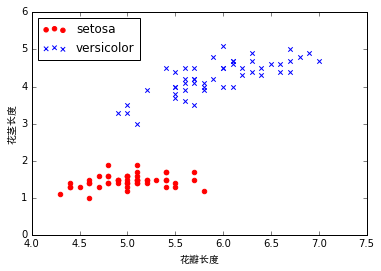

In [11]:
plt.scatter(x[:50,0],x[:50,1],color='red',marker='o',label='setosa')
plt.scatter(x[50:100,0],x[50:100,1],color='blue',marker='x',label='versicolor')
plt.xlabel(u'花瓣长度',fontproperties='SimHei')
plt.ylabel(u'花茎长度',fontproperties='SimHei')
plt.legend(loc='upper left')
plt.show()

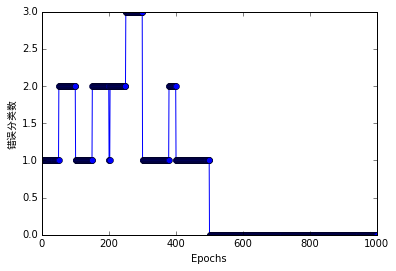

In [12]:
ppn = Perceptron(eta=0.01,n_iter=10)
ppn.fit(x,y)
plt.plot(range(1,len(ppn.errors_) + 1),ppn.errors_, marker='o')
plt.xlabel('Epochs')
plt.ylabel(u'错误分类数',fontproperties='SimHei')
plt.show()

In [13]:
from matplotlib.colors import ListedColormap
def plot_decision_regions(x,y,classifier,resolution=0.02):
    marker = ('s','x','o','v')
    colors = ('red','blue','lightgreen','gray','cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])
    
    x1_min, x1_max = x[:,0].min()-1,x[0:,0].max()
    x2_min, x2_max = x[:,1].min()-1,x[0:,1].max()
    
    xx1,xx2 = np.meshgrid(np.arange(x1_min,x1_max,resolution),
                         np.arange(x2_min,x2_max,resolution))
    
    z = classifier.predict(np.array([xx1.ravel(),xx2.ravel()]).T)
    print(xx1.ravel())
    print(xx2.ravel())
    print(z)
    
    z = z.reshape(xx1.shape)
    plt.contourf(xx1,xx2,z,alpha=0.4,cmap=cmap)
    plt.xlim(xx1.min(),xx1.max())
    plt.ylim(xx2.min(),xx2.max())
    
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=x[y==cl,0],y=x[y==cl,1],alpha=0.8,c=cmap(idx),marker=marker[idx],label=cl)
    

[ 3.3   3.32  3.34 ...,  6.94  6.96  6.98]
[ 0.    0.    0.   ...,  5.08  5.08  5.08]
[-1 -1 -1 ...,  1  1  1]


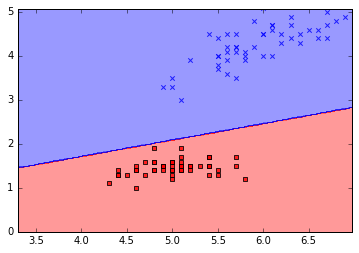

In [14]:
plot_decision_regions(x,y,ppn,resolution=0.02)

In [15]:
y.shape

(100,)

[ 3.3   3.32  3.34 ...,  6.94  6.96  6.98]
[ 0.    0.    0.   ...,  5.08  5.08  5.08]
[-1 -1 -1 ...,  1  1  1]


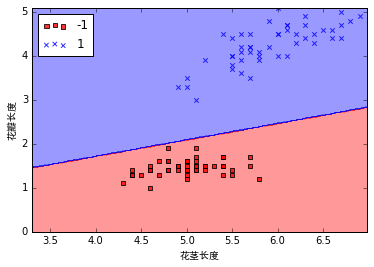

In [16]:
plot_decision_regions(x,y,ppn,resolution=0.02)
plt.xlabel(u'花茎长度',fontproperties='SimHei')
plt.ylabel(u'花瓣长度',fontproperties='SimHei')
plt.legend(loc='upper left')
plt.show()